In [1]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 2.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import shap
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv('/content/Wine dataset.csv')

In [4]:
df.head()


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.shape

(178, 14)

In [6]:
df.isnull().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [8]:
df.dtypes

class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

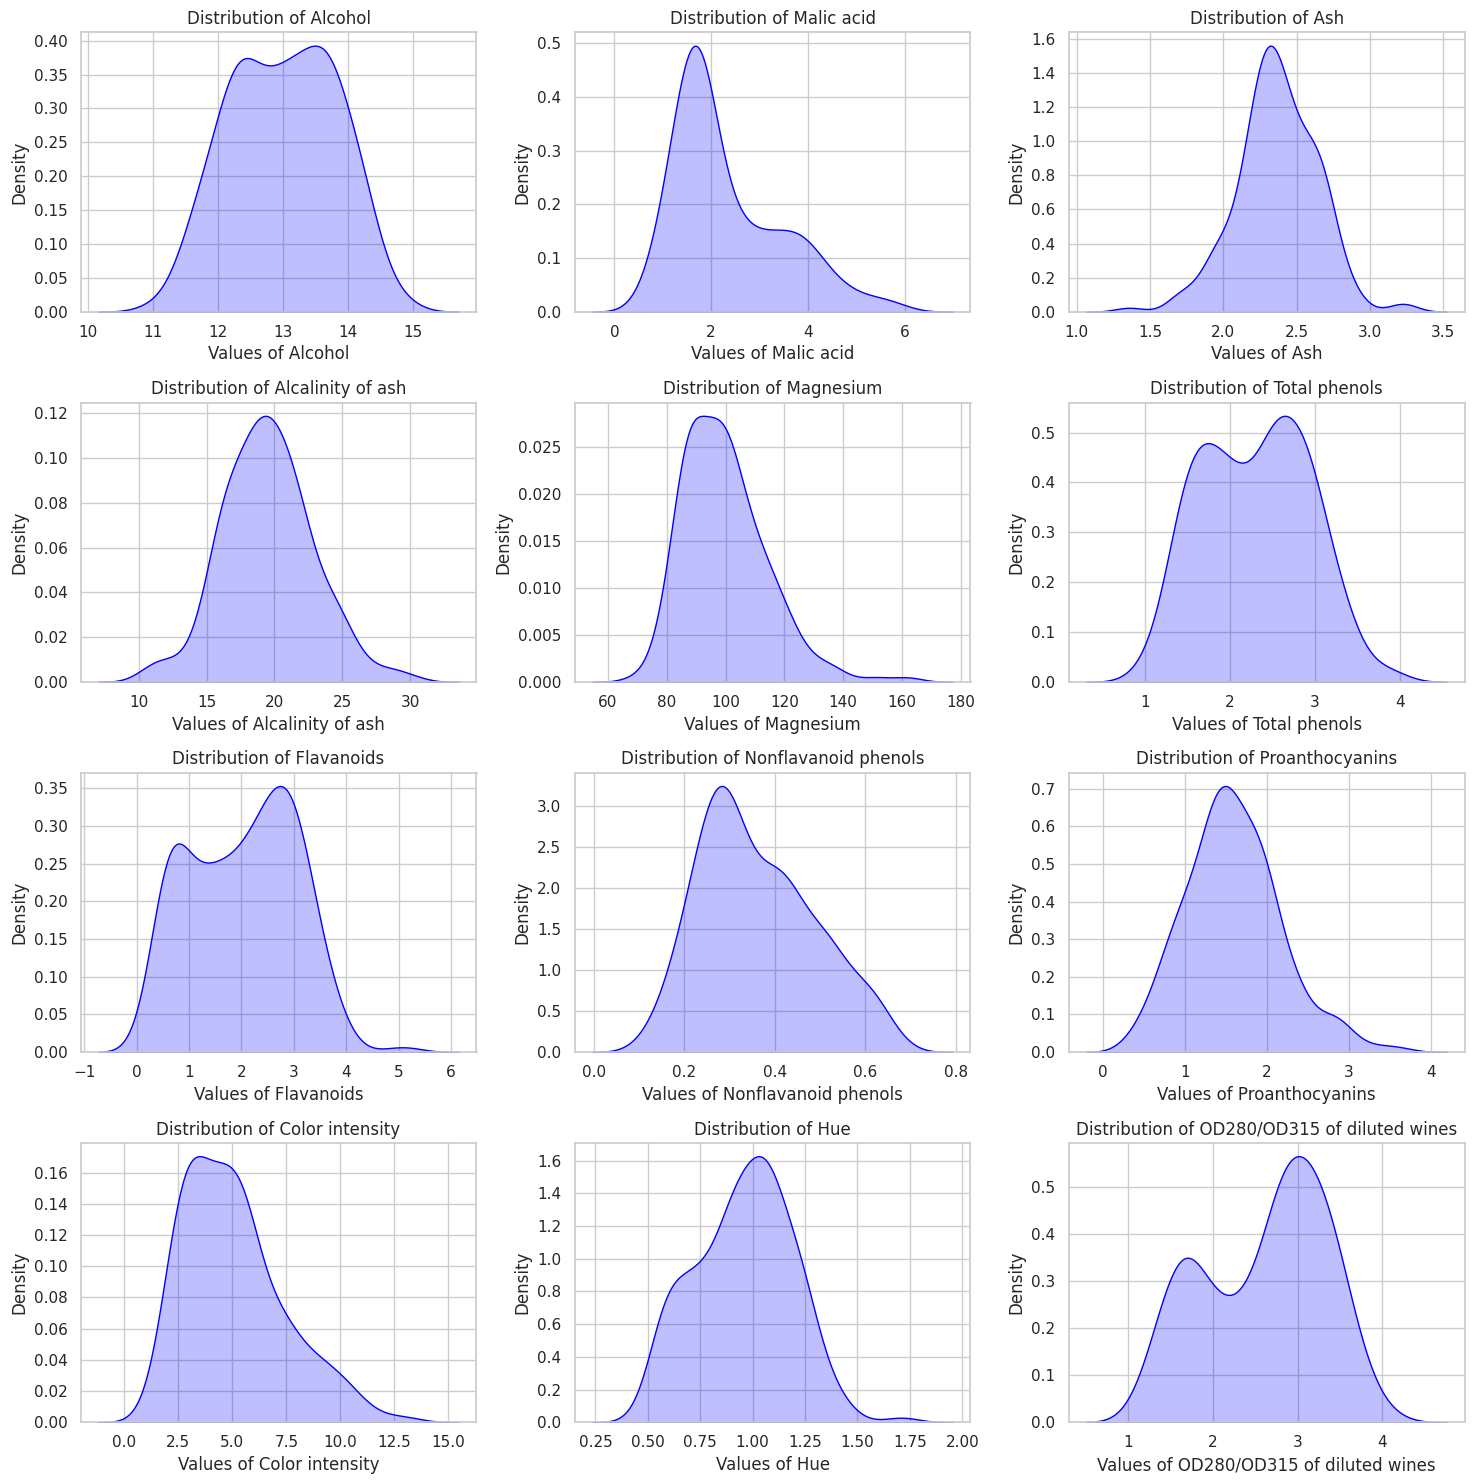

In [9]:
sns.set(style="whitegrid")
variables_to_plot = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                     'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                     'Color intensity', 'Hue', 'OD280/OD315 of diluted wines']

df.columns = df.columns.str.strip()
num_variables = len(variables_to_plot)
num_rows = (num_variables - 1) // 3+1
num_cols = min(num_variables, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

axes = axes.flatten()

for i, variable in enumerate(variables_to_plot):
  sns.kdeplot(df[variable], ax = axes[i], color ='blue', fill= True, common_norm=False)
  axes[i].set_title(f'Distribution of {variable}')
  axes[i].set_xlabel(f'Values of {variable}')
  axes[i].set_ylabel('Density')

plt.tight_layout(h_pad = 1)
plt.show()



In [27]:
explainer = shap.TreeExplainer(clf)

In [28]:
shap_values = explainer.shap_values(x)

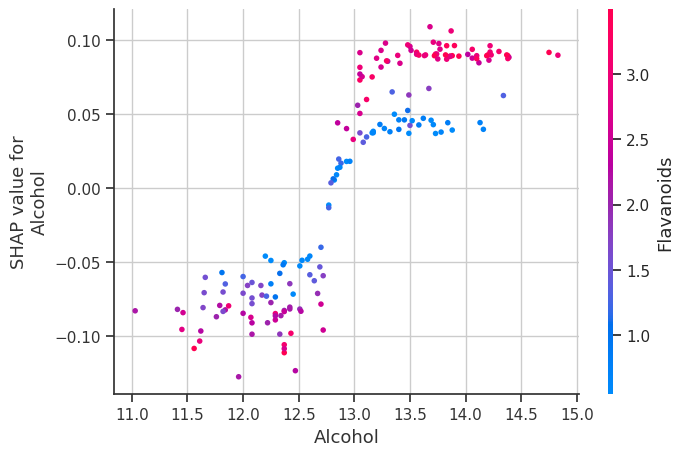

In [29]:
shap.dependence_plot('Alcohol', shap_values[0], x)

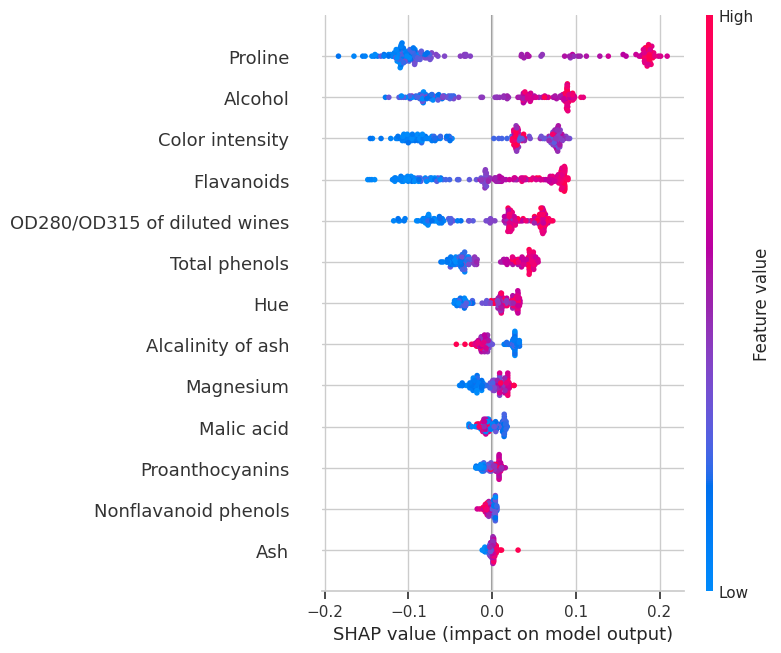

In [30]:
shap.summary_plot(shap_values[0], x)

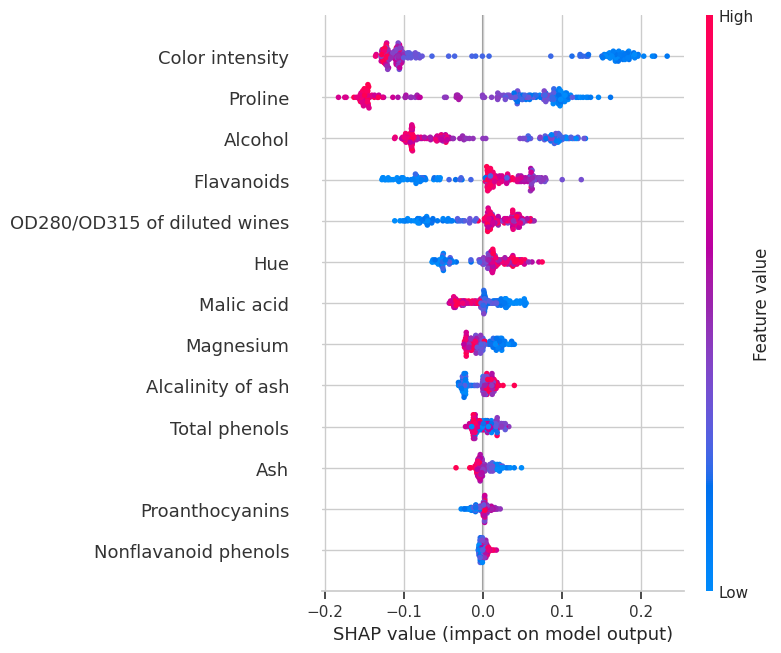

In [31]:
shap.summary_plot(shap_values[1], x)

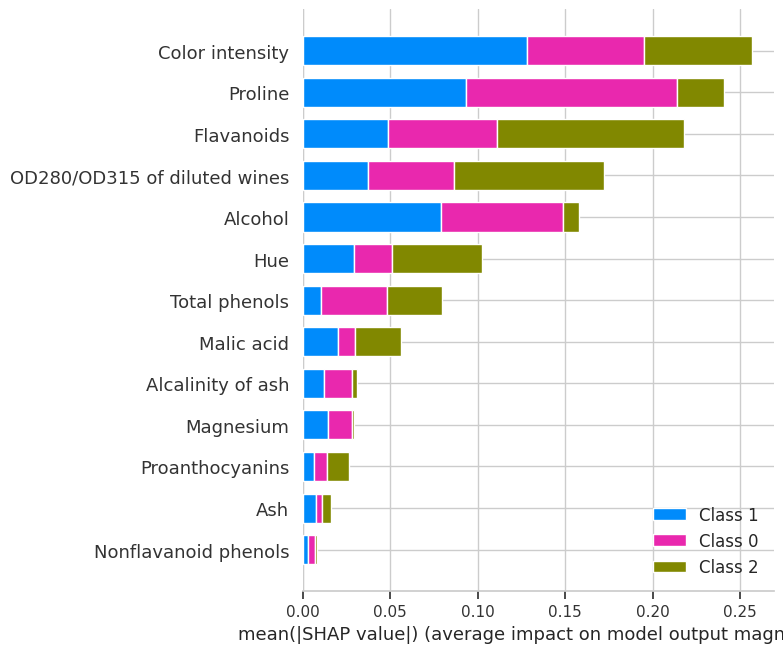

In [32]:
shap.summary_plot(shap_values, x_train, plot_type= 'bar')